# PGD

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() # 現在のカレントディレクトリを確認
print(path)

/home/mori/banzai/machine-learning-phases-of-matter/DefaultModel_2017


In [4]:
# Input the data
M = pd.read_csv(path + '/M.csv')
S = pd.read_csv(path + '/SP.csv')

In [5]:
# Prepare the data
data = []

# ALL_data
# 1920年から2017年のMoody's
data.append(M.iloc[0:99,5:7])
# 1981年から2017年のMoody's
data.append(M.iloc[61:99,5:7])
# 1981年から2017年のS&P
data.append(S.iloc[0:38,5:7])
# 1990年から2017年のMoody's
data.append(M.iloc[70:99,5:7])
# 1990年から2017年のS&P
data.append(S.iloc[9:38,5:7])

# Speculative_grade_data
# 1920年から2017年のMoody's
data.append(M.iloc[0:99,1:3])
# 1981年から2017年のMoody's
data.append(M.iloc[61:99,1:3])
# 1981年から2017年のS&P
data.append(S.iloc[0:38,1:3])
# 1990年から2017年のMoody's
data.append(M.iloc[70:99,1:3])
# 1990年から2017年のS&P
data.append(S.iloc[9:38,1:3])

# Investment_grade_data
# 1920年から2017年のMoody's
data.append(M.iloc[0:99,3:5])
# 1981年から2017年のMoody's
data.append(M.iloc[61:99,3:5])
# 1981年から2017年のS&P
data.append(S.iloc[0:38,3:5])
# 1990年から2017年のMoody's
data.append(M.iloc[70:99,3:5])
# 1990年から2017年のS&P
data.append(S.iloc[9:38,3:5])

In [6]:
# Prepare the titles
titles = ["Moody's,ALL,1920-2018","Moody's,ALL,1981-2018","S&P,ALL,1981-2017", \
          "Moody's,ALL,1990-2018","S&P,ALL,1990-2017","Moody's,SG,1920-2018", \
          "Moody's,SG,1981-2018","S&P,SG,1981-2017","Moody's,SG,1990-2018", \
          "S&P,SG,1990-2017","Moody's,IG,1920-2018","Moody's,IG,1981-2018",\
          "S&P,IG,1981-2017","Moody's,IG,1990-2018","S&P,IG,1990-2017"]  # etc.

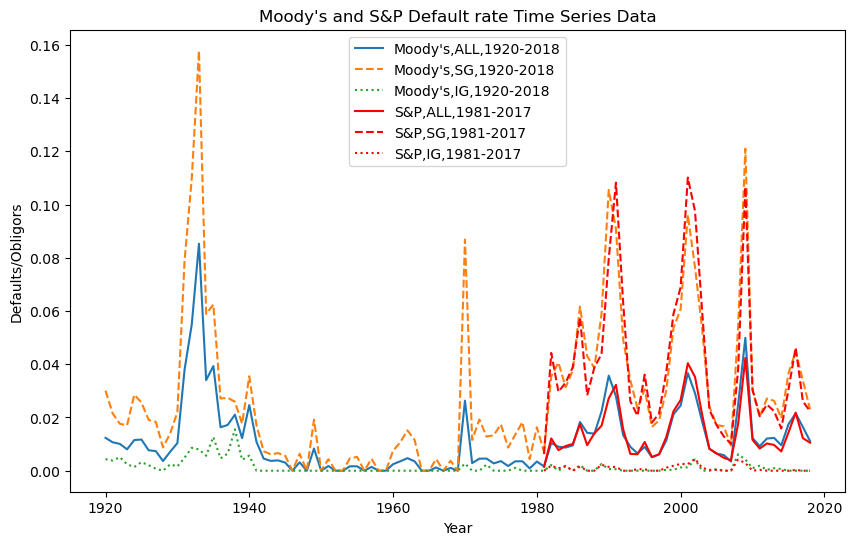

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(range(1920, 2019), data[0].iloc[:,1] / data[0].iloc[:,0], label=titles[0])
plt.plot(range(1920, 2019), data[5].iloc[:,1] / data[5].iloc[:,0], label=titles[5], linestyle='dashed')
plt.plot(range(1920, 2019), data[10].iloc[:,1] / data[10].iloc[:,0], label=titles[10], linestyle='dotted')
plt.plot(range(1981, 2019), data[2].iloc[:,1] / data[2].iloc[:,0], label=titles[2], color='red')
plt.plot(range(1981, 2019), data[7].iloc[:,1] / data[7].iloc[:,0], label=titles[7], linestyle='dashed', color='red')
plt.plot(range(1981, 2019), data[12].iloc[:,1] / data[12].iloc[:,0], label=titles[12], linestyle='dotted', color='red')
plt.xlabel('Year')
plt.ylabel('Defaults/Obligors')
plt.title("Moody's and S&P Default rate Time Series Data")
plt.legend()
plt.show()

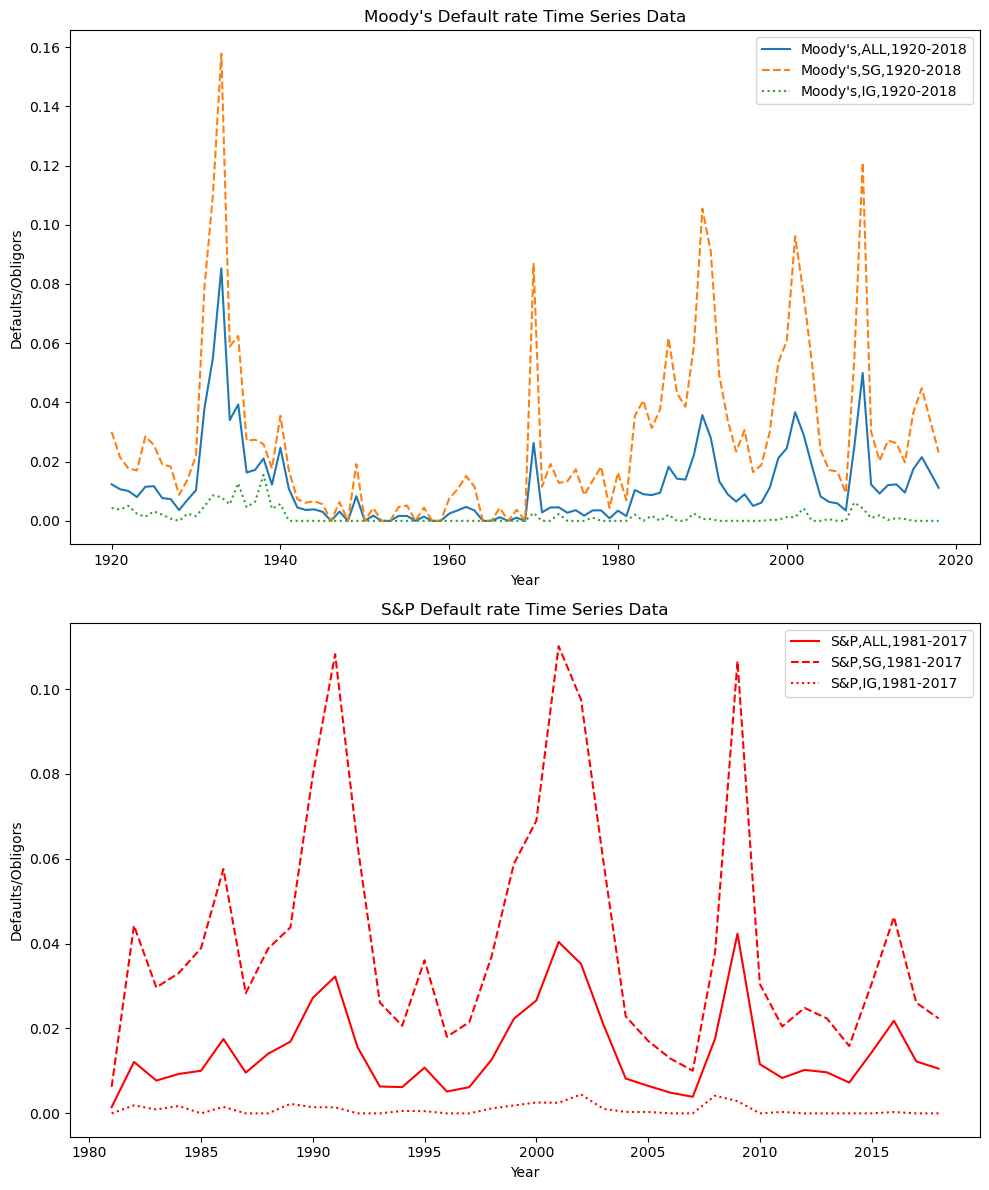

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot M.csv data
axs[0].plot(range(1920, 2019), data[0].iloc[:,1] / data[0].iloc[:,0], label=titles[0])
axs[0].plot(range(1920, 2019), data[5].iloc[:,1] / data[5].iloc[:,0], label=titles[5], linestyle='dashed')
axs[0].plot(range(1920, 2019), data[10].iloc[:,1] / data[10].iloc[:,0], label=titles[10], linestyle='dotted')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Defaults/Obligors')
axs[0].set_title("Moody's Default rate Time Series Data")
axs[0].legend()

# Plot S.csv data
axs[1].plot(range(1981, 2019), data[2].iloc[:,1] / data[2].iloc[:,0], label=titles[2], color='red')
axs[1].plot(range(1981, 2019), data[7].iloc[:,1] / data[7].iloc[:,0], label=titles[7], linestyle='dashed', color='red')
axs[1].plot(range(1981, 2019), data[12].iloc[:,1] / data[12].iloc[:,0], label=titles[12], linestyle='dotted', color='red')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Defaults/Obligors')
axs[1].set_title("S&P Default rate Time Series Data")
axs[1].legend()

plt.tight_layout()
plt.show()

図上：Moody’s Default Rate from 1920–2017. 

図下:S&P Default Rate from 1981–2017.

実線と点線はそれぞれ、BBB+(Baa3)以下の全サンプルと投機的等級に対応する。

## 平均デフォルト率

In [9]:
lambda_avg = []
I = 15
for i in range(I):
    lambda_avg.append(round(data[i].iloc[:,1].sum() / data[i].iloc[:,0].sum(), 3))

In [10]:
# Create DataFrame
result = pd.DataFrame(list(zip(titles, lambda_avg)), columns=["Title", "Lambda_ave"])

# Show DataFrame
result

,Title,Lambda_ave
0,"Moody's,ALL,1920-2018",0.015
1,"Moody's,ALL,1981-2018",0.016
2,"S&P,ALL,1981-2017",0.015
3,"Moody's,ALL,1990-2018",0.016
4,"S&P,ALL,1990-2017",0.016
5,"Moody's,SG,1920-2018",0.037
6,"Moody's,SG,1981-2018",0.041
7,"S&P,SG,1981-2017",0.039
8,"Moody's,SG,1990-2018",0.041
9,"S&P,SG,1990-2017",0.039


## ポアソン・ガンマ分布
- ガンマポアソン分布

$$
P(k_t| n_t , \beta ) = \frac{\Gamma(k_t + n_t)}{\Gamma(k_t + 1) \Gamma(n_t)} \frac{\beta^{n_t}}{(\beta + 1)^{k_t + n_t}}
$$

- パラメータ

$$ 
\theta = \frac{1}{\beta}
$$
- 期待値

$$
E[k_t] = n_t\frac{1}{\beta}
$$

- 分散
  
$$
Var[k_t] = n_t\frac{1 + \beta}{\beta}
$$

- 対数尤度
  
$$
\log L = \sum_{t=1}^T \log P(k_t| n_t , \beta )
$$

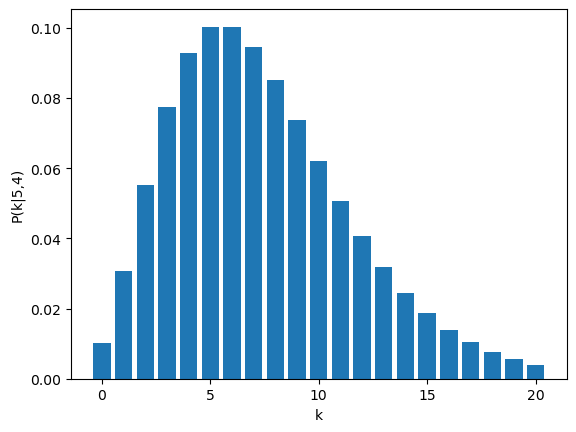

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# パラメータの設定
r = 5  # 成功回数
p = 0.4  # 成功確率

# X軸の値の範囲を設定
x = np.arange(0, 21)

# 負の二項分布の確率質量関数（PMF）を計算
pmf = nbinom.pmf(x, r, p)

# プロットの作成
plt.bar(x, pmf)
plt.xlabel('k')
plt.ylabel('P(k|5,4)')
plt.show()